# Example implementation of a NN on a Healpix map

In [2]:
import numpy as np
import nnhealpix
import nnhealpix
import nnhealpix.layers
import healpy as hp
import tensorflow as tf
import tensorflow.keras
import matplotlib.pyplot as plt
# %matplotlib notebook

In [3]:
input_nside = 64
m = np.arange(hp.nside2npix(input_nside))

## DGrade

In [4]:
output_nside = 8
inputs = tf.keras.layers.Input((len(m), 1))
x = nnhealpix.layers.Dgrade(input_nside, output_nside)(inputs)
model =tf.keras.models.Model(inputs=inputs, outputs=x)
model.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.SGD(lr=0.01))
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 49152, 1)]        0         
_________________________________________________________________
order_map (OrderMap)         (None, 49152, 1)          49152     
_________________________________________________________________
average_pooling1d (AveragePo (None, 768, 1)            0         
Total params: 49,152
Trainable params: 49,152
Non-trainable params: 0
_________________________________________________________________


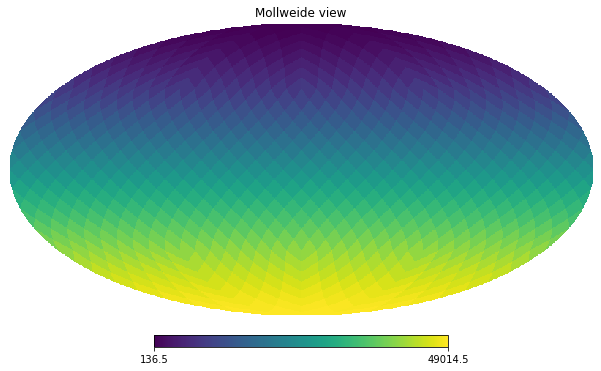

In [5]:
mtensor = m.reshape(1, len(m), 1)
out = model.predict(mtensor)
out = out.reshape(hp.nside2npix(8))
hp.mollview(out)

## MaxPooling

In [6]:
inputs = tf.keras.layers.Input((len(m), 1))
x = nnhealpix.layers.MaxPooling(input_nside, output_nside)(inputs)
model = tf.keras.models.Model(inputs=inputs, outputs=x)
model.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.SGD(lr=0.01))
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 49152, 1)]        0         
_________________________________________________________________
order_map_1 (OrderMap)       (None, 49152, 1)          49152     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 768, 1)            0         
Total params: 49,152
Trainable params: 49,152
Non-trainable params: 0
_________________________________________________________________


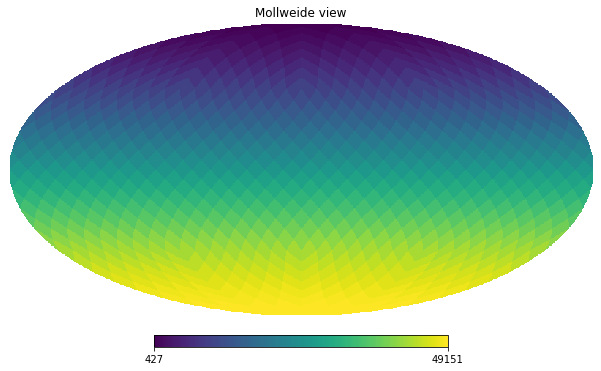

In [7]:
mtensor = m.reshape(1, len(m), 1)
out = model.predict(mtensor)
out = out.reshape(hp.nside2npix(output_nside))
hp.mollview(out)

## ConvNeighbours

In [8]:
mtensor = m.reshape(1, len(m), 1)
inputs = tf.keras.layers.Input((len(m), 1))
x = nnhealpix.layers.ConvNeighbours(input_nside, filters=32, kernel_size=9)(inputs)
model = tf.keras.models.Model(inputs=inputs, outputs=x)
model.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.SGD(lr=0.01))
model.summary()
out = model.predict(mtensor)



Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 49152, 1)]        0         
_________________________________________________________________
order_map_2 (OrderMap)       (None, 442368, 1)         442368    
_________________________________________________________________
conv1d (Conv1D)              (None, 49152, 32)         288       
Total params: 442,656
Trainable params: 442,656
Non-trainable params: 0
_________________________________________________________________
